<a href="https://colab.research.google.com/github/eumjeongseok/2023_Capstone_with_KETI_Project_File/blob/main/_6_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98(PyTorch)_%ED%95%9C%EB%B2%88%EC%97%90_%EB%81%9D%EB%82%B4%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

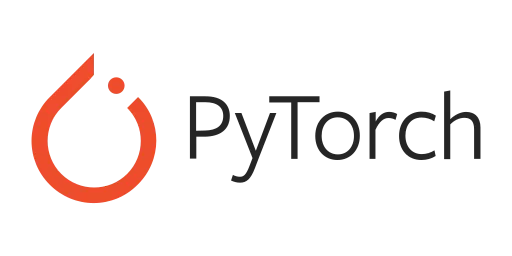

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치 모듈 구조

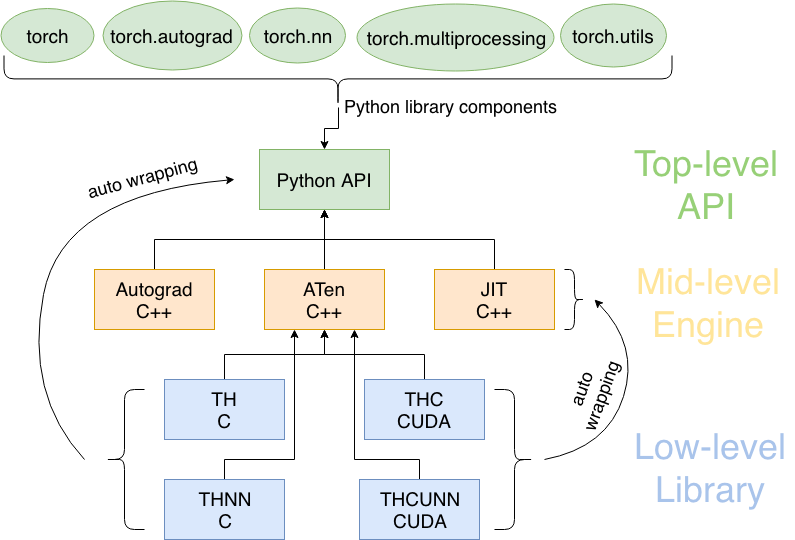

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

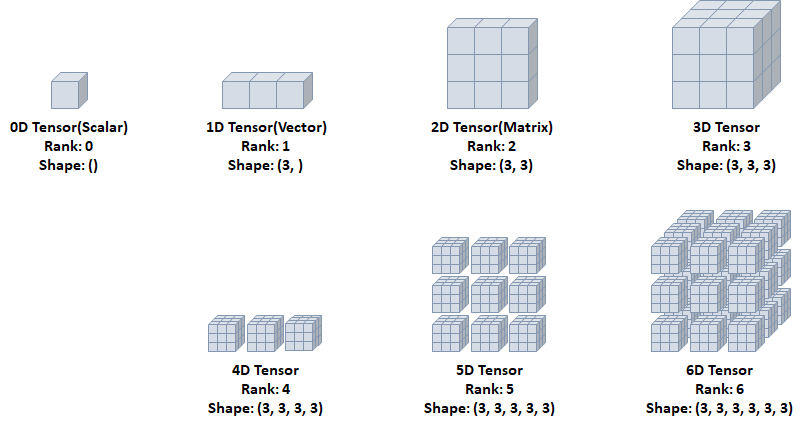

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [ ]:
x = torch.empty(4, 2)
print(x)

tensor([[ 5.0120e+09,  1.2386e+04],
        [ 3.3803e-33,  4.5395e-41],
        [ 4.5336e-09,  4.5394e-41],
        [-3.8158e+10,  4.0395e-26]])


무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4, 2)
print(x)

tensor([[0.7382, 0.9734],
        [0.0179, 0.6973],
        [0.1424, 0.6117],
        [0.0238, 0.4485]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype=torch.long) #데이터 타입이 long이다.
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [ ]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [ ]:
x = torch.randn_like(x, dtype = torch.float)
print(x)

tensor([[-0.1680,  1.2751, -0.2876, -0.3711],
        [-0.2610,  1.1093, -0.3242, -0.3476]])


텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [ ]:
ft=torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())
#타입 변환

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [ ]:
x=torch.randn(1) #하나의 값을 무작위로 할당
print(x)
print(x.item()) #실제 값
print(x.dtype)

tensor([-2.0028])
-2.0027694702148438
torch.float32


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y=torch.ones_like(x, device=device)
print(y) #cuda 텐서가 정의됨
x=x.to(device)
print(x)
z=x+y
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([-2.0028], device='cuda:0')
tensor([-1.0028], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [ ]:
t0=torch.tensor(0)
print(t0.ndim) #차원 정보
print(t0.shape) #형태
print(t0) #값

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [ ]:
t1=torch.tensor([1, 2, 3])
print(t1.ndim) #차원 정보
print(t1.shape) #형태
print(t1) #값

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

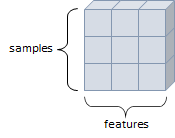

In [ ]:
t2=torch.tensor([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
print(t2.ndim) #차원 정보
print(t2.shape) #형태
print(t2) #값

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

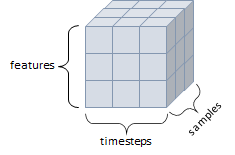

In [ ]:
t3=torch.tensor([[[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]],
                [[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]],
                [[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]]])
print(t3.ndim) #차원 정보
print(t3.shape) #형태
print(t3) #값

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

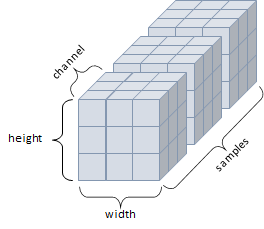

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
import math
a=torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a)) #절댓값
print(torch.ceil(a)) #올림
print(torch.floor(a)) #내림
print(torch.clamp(a, -0.5, 0.5)) #조이기, 구간 내로 값 찝기

tensor([[0.7641, 0.1985]])
tensor([[0.7641, 0.1985]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.1985]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) #모든 숫자의 곱
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2]))) #고유한 값(중복 제거)

tensor([[0.7641, 0.1985]])
tensor(0.1985)
tensor(0.7641)
tensor(0.4813)
tensor(0.3999)
tensor(0.1516)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [ ]:
x=torch.rand(2, 2)
print(x)
print(x.max(dim=0)) #=argmax, dim=0이면 행방향
print(x.max(dim=1)) #dim=1이면 열방향

tensor([[0.7134, 0.2135],
        [0.3063, 0.7803]])
torch.return_types.max(
values=tensor([0.7134, 0.7803]),
indices=tensor([0, 1]))
torch.return_types.max(
values=tensor([0.7134, 0.7803]),
indices=tensor([0, 1]))


In [ ]:
print(x)
print(x.min(dim=0)) #=argmin, dim=0이면 행방향
print(x.min(dim=1)) #dim=1이면 열방향

tensor([[0.7134, 0.2135],
        [0.3063, 0.7803]])
torch.return_types.min(
values=tensor([0.3063, 0.2135]),
indices=tensor([1, 0]))
torch.return_types.min(
values=tensor([0.2135, 0.3063]),
indices=tensor([1, 0]))


In [ ]:
x=torch.rand(2, 2)
print(x)
y=torch.rand(2, 2)
print(y)

tensor([[0.7919, 0.4227],
        [0.1248, 0.7857]])
tensor([[0.1059, 0.4009],
        [0.1873, 0.5559]])


`torch.add`: 덧셈

In [ ]:
print(x+y)
print(torch.add(x, y))

tensor([[0.8979, 0.8236],
        [0.3121, 1.3416]])
tensor([[0.8979, 0.8236],
        [0.3121, 1.3416]])


결과 텐서를 인자로 제공

In [ ]:
result=torch.empty(2, 4)
torch.add(x, y, out=result) #result에 넣어줘!
print(result)

tensor([[0.8979, 0.8236],
        [0.3121, 1.3416]])


<ipython-input-37-3889b5e96a03>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:26.)
  torch.add(x, y, out=result) #result에 넣어줘!


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
import torch
x=torch.rand(2, 2)
y=torch.rand(2, 2)

print(x)
print(y)
y.add_(x) #y = y + x
print(y)

tensor([[0.4131, 0.9241],
        [0.2130, 0.2028]])
tensor([[0.8475, 0.7534],
        [0.8160, 0.1792]])
tensor([[1.2606, 1.6775],
        [1.0290, 0.3820]])


`torch.sub`: 뺄셈

In [ ]:
print(x)
print(y)
print(x-y)
print(torch.sub(x, y))
print(x.sub(y)) #x=x-y

tensor([[0.4131, 0.9241],
        [0.2130, 0.2028]])
tensor([[1.2606, 1.6775],
        [1.0290, 0.3820]])
tensor([[-0.8475, -0.7534],
        [-0.8160, -0.1792]])
tensor([[-0.8475, -0.7534],
        [-0.8160, -0.1792]])
tensor([[-0.8475, -0.7534],
        [-0.8160, -0.1792]])


`torch.mul`: 곱셉

In [ ]:
print(x)
print(y)
print(x*y)
print(torch.mul(x, y))
print(x.mul(y)) #x=x*y

tensor([[0.4131, 0.9241],
        [0.2130, 0.2028]])
tensor([[1.2606, 1.6775],
        [1.0290, 0.3820]])
tensor([[0.5207, 1.5502],
        [0.2192, 0.0775]])
tensor([[0.5207, 1.5502],
        [0.2192, 0.0775]])
tensor([[0.5207, 1.5502],
        [0.2192, 0.0775]])


`torch.div`: 나눗셈

In [ ]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y)) #x=x/y

tensor([[0.4131, 0.9241],
        [0.2130, 0.2028]])
tensor([[1.2606, 1.6775],
        [1.0290, 0.3820]])
tensor([[0.3277, 0.5509],
        [0.2070, 0.5309]])
tensor([[0.3277, 0.5509],
        [0.2070, 0.5309]])
tensor([[0.3277, 0.5509],
        [0.2070, 0.5309]])


`torch.mm`: 내적(dot product)

In [ ]:
print(x)
print(y)
print(torch.matmul(x, y))
z=torch.mm(x, y)
print(z)
print(torch.svd(z))

tensor([[0.4131, 0.9241],
        [0.2130, 0.2028]])
tensor([[1.2606, 1.6775],
        [1.0290, 0.3820]])
tensor([[1.4716, 1.0459],
        [0.4772, 0.4348]])
tensor([[1.4716, 1.0459],
        [0.4772, 0.4348]])
torch.return_types.svd(
U=tensor([[-0.9422, -0.3350],
        [-0.3350,  0.9422]]),
S=tensor([1.9160, 0.0734]),
V=tensor([[-0.8071, -0.5904],
        [-0.5904,  0.8071]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
x = torch.Tensor([[1, 2],
                 [3, 4]])
print(x)
print(x[0, 0]) #인덱스 위치
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0]) #: -> slicing(해당 내용을 모두 선택), 첫 번째는 행, 두 번째는 열
print(x[:, 1])
print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x=torch.randn(4, 5)
print(x)
y=x.view(20) #flat하게 출력
print(y)
z=x.view(5, -1) #행은 5개, 열은 마음대로(-1)
print(z)

tensor([[-0.9419,  1.8506, -0.8541, -2.4004,  1.4306],
        [-0.8561,  0.2224,  0.0547, -0.5758, -1.9466],
        [ 0.7686, -0.9156,  1.2746,  2.0815, -0.0736],
        [-1.4155, -0.0617, -0.6098,  1.2812,  0.0476]])
tensor([-0.9419,  1.8506, -0.8541, -2.4004,  1.4306, -0.8561,  0.2224,  0.0547,
        -0.5758, -1.9466,  0.7686, -0.9156,  1.2746,  2.0815, -0.0736, -1.4155,
        -0.0617, -0.6098,  1.2812,  0.0476])
tensor([[-0.9419,  1.8506, -0.8541, -2.4004],
        [ 1.4306, -0.8561,  0.2224,  0.0547],
        [-0.5758, -1.9466,  0.7686, -0.9156],
        [ 1.2746,  2.0815, -0.0736, -1.4155],
        [-0.0617, -0.6098,  1.2812,  0.0476]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x=torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5501])
-0.5501031875610352
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [ ]:
x=torch.randn(2)
print(x)
print(x.item()) #Error occured! Because it is not scalar.
print(x.dtype)

tensor([-1.0877, -0.0110])


RuntimeError: ignored

`squeeze`: 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.2825, 0.4191, 0.3997],
         [0.5016, 0.5865, 0.8968],
         [0.5632, 0.9324, 0.0697]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.2825, 0.4191, 0.3997],
        [0.5016, 0.5865, 0.8968],
        [0.5632, 0.9324, 0.0697]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [ ]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.6584, 0.6314, 0.6768],
        [0.6413, 0.9687, 0.5640],
        [0.4658, 0.2227, 0.0087]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.6584, 0.6314, 0.6768],
         [0.6413, 0.9687, 0.5640],
         [0.4658, 0.2227, 0.0087]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=2) #dimension = index of column
print(tensor)
print(tensor.shape)

tensor([[[0.6584],
         [0.6314],
         [0.6768]],

        [[0.6413],
         [0.9687],
         [0.5640]],

        [[0.4658],
         [0.2227],
         [0.0087]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [ ]:
x=torch.FloatTensor([1, 4])
print(x)
y=torch.FloatTensor([2, 5])
print(y)
z=torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0) #1번째 열의 차원 수 결합
print(c)
print(c.size())

tensor([[[ 0.1806,  0.0051,  0.4443],
         [-0.8699, -1.0747, -1.1627],
         [-0.4529, -1.7789,  0.1641]]])
tensor([[[ 0.8895,  0.7353, -0.2465],
         [-0.0024,  0.7482,  1.5842],
         [ 1.1191,  0.9267,  0.4669]]])
tensor([[[ 0.1806,  0.0051,  0.4443],
         [-0.8699, -1.0747, -1.1627],
         [-0.4529, -1.7789,  0.1641]],

        [[ 0.8895,  0.7353, -0.2465],
         [-0.0024,  0.7482,  1.5842],
         [ 1.1191,  0.9267,  0.4669]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a, b), dim=1) #2번째 열의 차원 수 결합
print(c)
print(c.size())

tensor([[[ 0.1806,  0.0051,  0.4443],
         [-0.8699, -1.0747, -1.1627],
         [-0.4529, -1.7789,  0.1641],
         [ 0.8895,  0.7353, -0.2465],
         [-0.0024,  0.7482,  1.5842],
         [ 1.1191,  0.9267,  0.4669]]])
torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a, b), dim=2) #3번째 열의 차원 수 결합
print(c)
print(c.size())

tensor([[[ 0.1806,  0.0051,  0.4443,  0.8895,  0.7353, -0.2465],
         [-0.8699, -1.0747, -1.1627, -0.0024,  0.7482,  1.5842],
         [-0.4529, -1.7789,  0.1641,  1.1191,  0.9267,  0.4669]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3, 6)
print(tensor)
t1,t2, t3 = torch.chunk(tensor, 3, dim=1) #개수를 사용
print(t1)
print(t2)
print(t3)

tensor([[0.8565, 0.6950, 0.0077, 0.0168, 0.9660, 0.6767],
        [0.2293, 0.6289, 0.9288, 0.5059, 0.0073, 0.6098],
        [0.1802, 0.9940, 0.5464, 0.6583, 0.4672, 0.7034]])
tensor([[0.8565, 0.6950],
        [0.2293, 0.6289],
        [0.1802, 0.9940]])
tensor([[0.0077, 0.0168],
        [0.9288, 0.5059],
        [0.5464, 0.6583]])
tensor([[0.9660, 0.6767],
        [0.0073, 0.6098],
        [0.4672, 0.7034]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [ ]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1) #크기를 사용

print(tensor)
print(t1)
print(t2)

tensor([[0.9687, 0.1037, 0.8006, 0.5228, 0.4811, 0.1193],
        [0.9795, 0.4580, 0.6069, 0.3628, 0.1149, 0.8032],
        [0.4405, 0.2119, 0.0454, 0.2354, 0.9787, 0.4192]])
tensor([[0.9687, 0.1037, 0.8006],
        [0.9795, 0.4580, 0.6069],
        [0.4405, 0.2119, 0.0454]])
tensor([[0.5228, 0.4811, 0.1193],
        [0.3628, 0.1149, 0.8032],
        [0.2354, 0.9787, 0.4192]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
import torch

a=torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b=a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)
#Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np

a=np.ones(7)
b=torch.from_numpy(a)
np.add(a, 1, out=a) #a = a + 1
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [ ]:
 a=torch.randn(3, 3)
 a=a+3
 print(a)
 print(a.requires_grad)

tensor([[4.5810, 0.5837, 3.6880],
        [2.9477, 3.1391, 3.5759],
        [3.0896, 2.1191, 3.0068]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True) #inplace 방식(값을 직접 대입)
print(a.requires_grad)

b=(a*a).sum()
print(b) #SumBackward0: 기록
print(b.grad_fn)

True
tensor(89.3347, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [ ]:
x=torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y=x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z=y*y
out=z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x=torch.randn(3, requires_grad=True)

y=x*2
while y.data.norm() < 1000:
  y=y*2

print(y)

tensor([-958.0574, -596.3484, -870.6801], grad_fn=<MulBackward0>)


In [ ]:
v=torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad) #**: 제곱

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y=x.detach()
print(y.requires_grad)
print(x.eq(y).all()) #x==y인가?

True
False
tensor(True)


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a=torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a=torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [ ]:
b=a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [ ]:
c=b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out=c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward() #이전에 작성한 값을 출력

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
import torch
a=torch.ones(2, 2, requires_grad=True)
b=a+2

print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-5-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad)


In [ ]:
c=b**2

print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-7-30fc31ccaf36>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(c.grad)


In [ ]:
out=c.sum()

print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-8-de0f34c23756>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(out.grad)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0))])

In [ ]:
trainset=datasets.MNIST(root='/content/',
                        train=True, download=True,
                        transform=mnist_transform)

testset=datasets.MNIST(root='/content/',
                        train=False, download=True,
                        transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 178827954.94it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 113742435.52it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46710059.41it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 25132623.70it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [ ]:
train_loader=DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader=DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
dataiter=iter(train_loader)
images, labels = next(dataiter)
#영상에는 dataiter.next()를 쓰는데, 이는 현재 동작하지 않음
#참고: https://stackoverflow.com/questions/74289077/attributeerror-multiprocessingdataloaderiter-object-has-no-attribute-next
images.shape, labels.shape

#8, 1, 28, 28: 28 * 28 흑백 이미지(1)

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image=torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

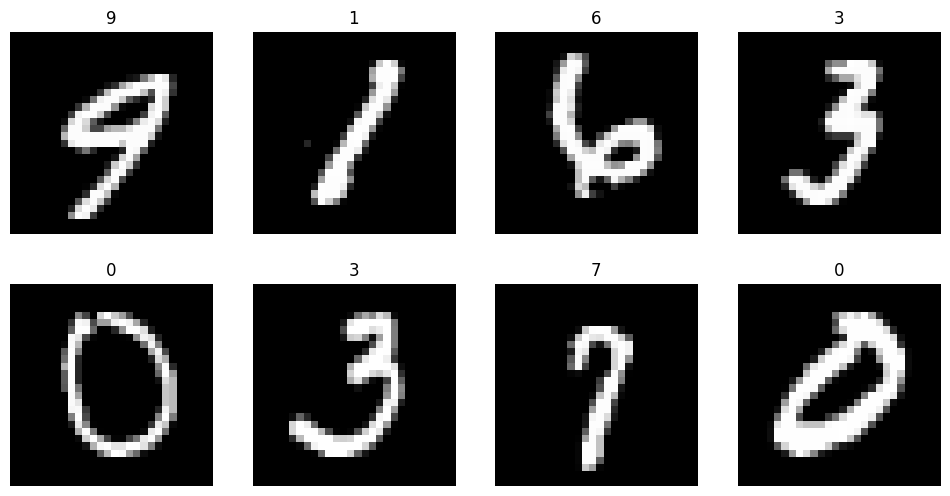

In [ ]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx=torch.randint(len(trainset), size=(1, )).item() #지정된 길이의 실제 값을 인덱스로 사용
  img, label = trainset[sample_idx] #위치를 가져옴
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [ ]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [ ]:
import torch

input=torch.randn(128, 20)
print(input)

m=nn.Linear(20, 30)
print(m)

output=m(input)
print(output)
print(output.size())

tensor([[-0.6750,  0.1313, -1.0065,  ...,  1.2715, -0.2046, -0.4351],
        [-0.1314, -0.6130, -0.6291,  ...,  1.2319,  0.1990,  0.4178],
        [ 1.0873,  0.7680,  1.2327,  ...,  0.3340,  1.0204,  0.2575],
        ...,
        [ 0.8432,  1.2559, -0.9393,  ...,  0.5476,  0.9302, -0.0805],
        [ 0.6489, -0.3635, -0.1593,  ..., -0.3257, -0.3346, -1.1913],
        [-1.2773, -1.7987, -0.8516,  ..., -0.9945, -1.7602,  0.2589]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.0261, -0.4979, -0.1148,  ...,  0.2608, -0.5871,  0.1251],
        [ 0.2833, -0.1365, -1.3640,  ...,  0.2408, -0.9596,  0.0018],
        [ 0.3627,  0.0261, -0.6575,  ...,  0.4138, -0.2236,  0.7506],
        ...,
        [ 0.2756,  0.6099,  0.0532,  ...,  0.0693, -0.0523,  0.6680],
        [ 0.4856,  0.0521,  0.5133,  ...,  0.7683,  0.6937, -1.0132],
        [-0.0097,  1.5168,  0.1218,  ...,  0.4169, -0.3370, -1.0143]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [ ]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [ ]:
m=nn.Conv2d(16, 33, 3, stride=2)
m=nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m=nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [ ]:
output=m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer=nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [ ]:
weight=layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weight=weight.detach()

In [ ]:
weight=weight.numpy()
weight.shape

(20, 1, 5, 5)

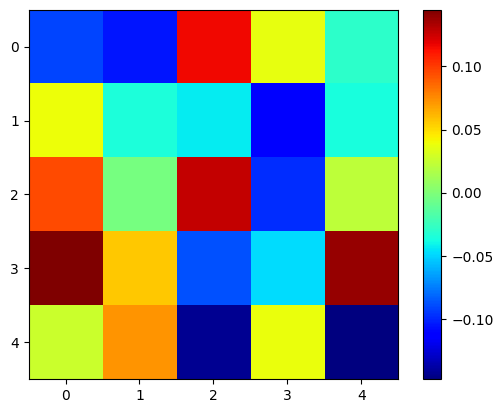

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(weight[0, 0, :, :], 'jet') #'gray'로 바꾸면 흑백이 된다.
plt.colorbar()
plt.show()

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0))])
trainset=datasets.MNIST(root='/content/',
                        train=True, download=True,
                        transform=mnist_transform)

testset=datasets.MNIST(root='/content/',
                        train=False, download=True,
                        transform=mnist_transform)
train_loader=DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader=DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)
dataiter=iter(train_loader)
images, labels = next(dataiter)
#참고로, 중간에 코랩 파일을 중단하면, 이전 내용이 삭제됩니다.


print(images.shape)
print(images[0].size())

input_image=torch.squeeze(images[0])
print(input_image.size())

100%|██████████| 9912422/9912422 [00:00<00:00, 93416808.77it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36475668.12it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27499120.84it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12418858.39it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
input_data=torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data=layer(input_data)
output=output_data.data
output_arr=output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

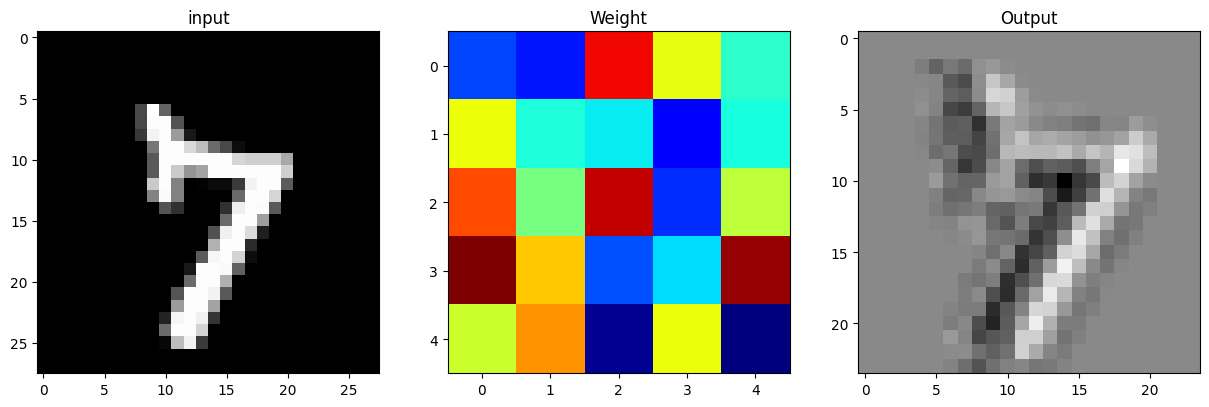

In [ ]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
import torch.nn.functional as F
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr=pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

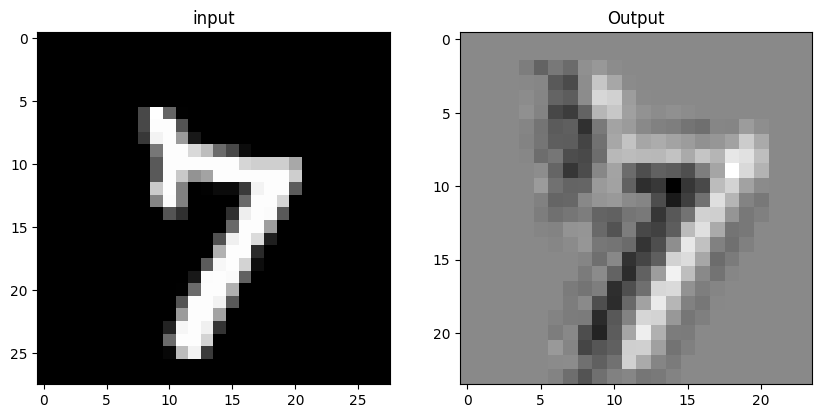

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [ ]:
flatten=input_image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin=nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[-0.3978,  0.1730,  0.2940, -0.5747,  0.3677, -0.2925,  0.0119,  0.4195,
         -0.2022, -0.3400]], grad_fn=<AddmmBackward0>)

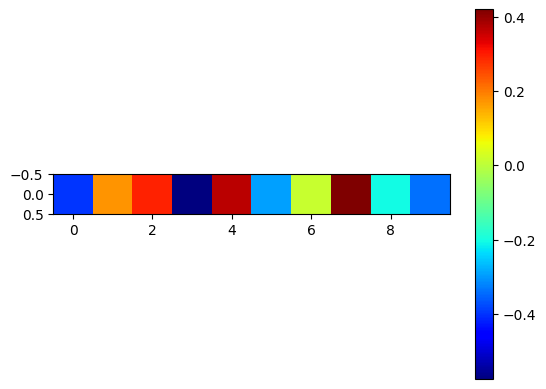

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [ ]:
with torch.no_grad():
  flatten=input_image.view(1, 28*28)
  lin=nn.Linear(784, 10)(flatten)
  softmax=F.softmax(lin,dim=1)

softmax

tensor([[0.1330, 0.1002, 0.0907, 0.0648, 0.0646, 0.1189, 0.1042, 0.1452, 0.1017,
         0.0766]])

In [ ]:
import numpy as np
np.sum(softmax.numpy())

1.0

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [ ]:
import torch
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs=torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer=nn.Conv2d(3, 20, 5, 1).to(device)
output=F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 신경망 종류

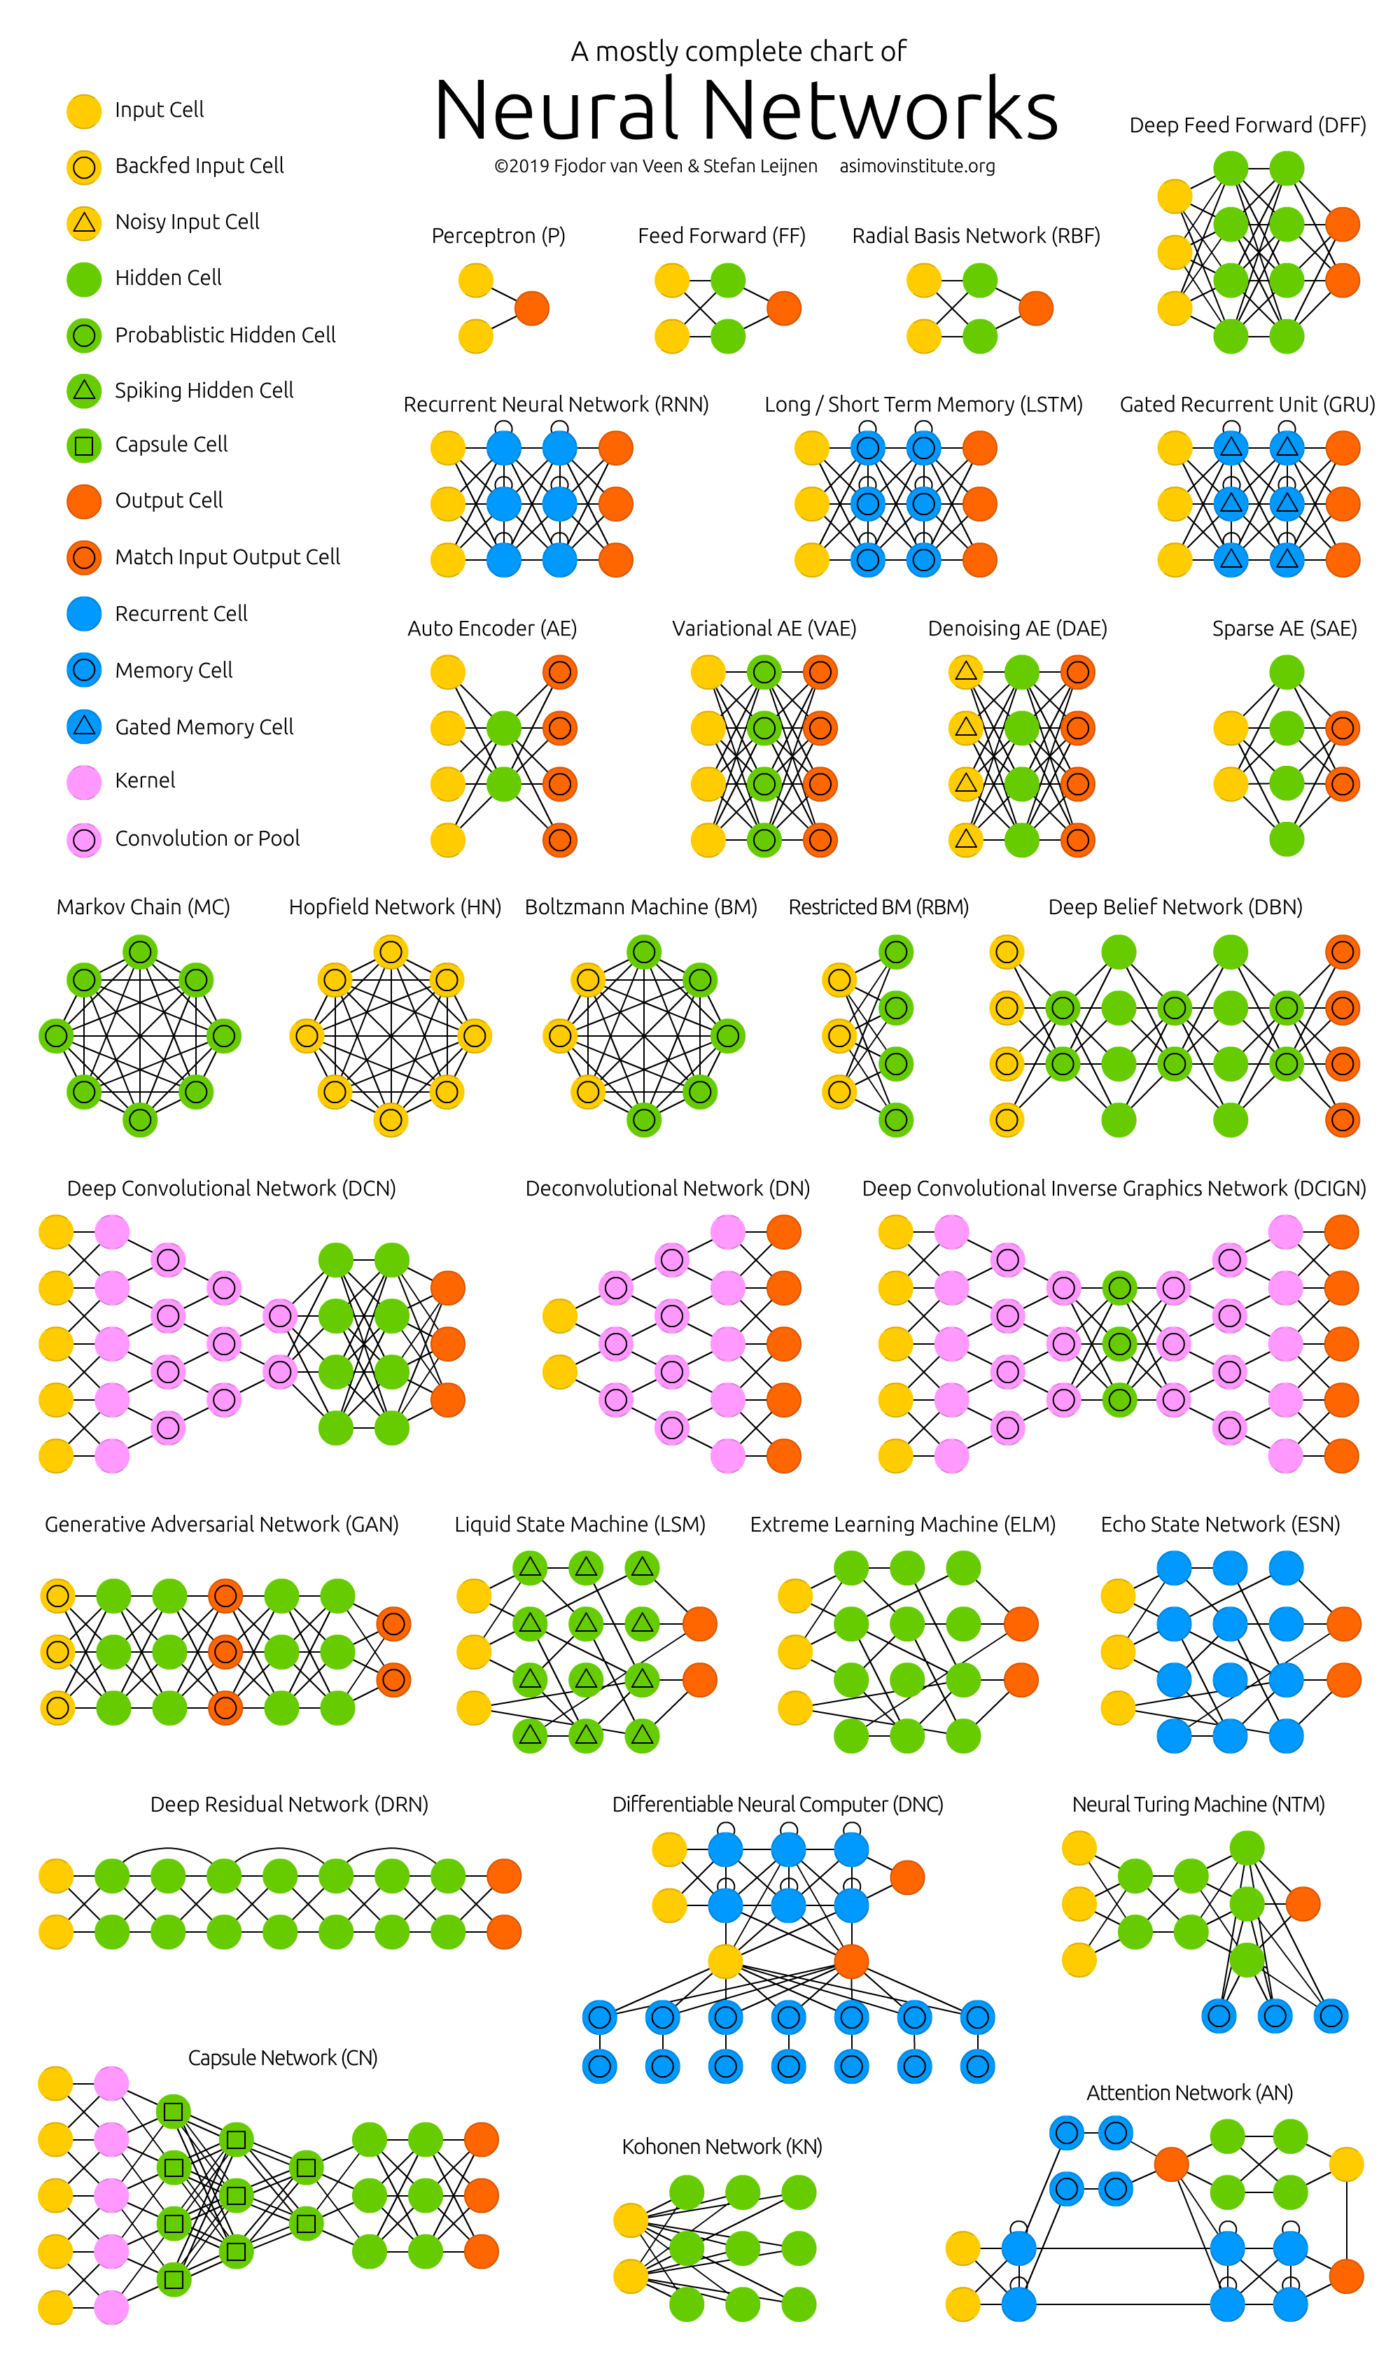

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [ ]:
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer=nn.Linear(inputs, 1)
    self.activtion=nn.Sigmoid()

  def forward(self, x):
    x=self.layer(x)
    x=self.activation(x)
    return x

In [ ]:
model=Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activtion): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2=nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )
    self.layer3=nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True)
    )

  def forward(self, x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=x.view(x.shape[0], -1)
    x=self.layer3(x)
    return x

In [ ]:
model=Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [ ]:
criterion=nn.MSELoss()
criterion=nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

In [ ]:
#no contents in here

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 6.7 MB/s eta 0:00:00


In [ ]:
import torchmetrics
import torch

preds=torch.randn(10, 5).softmax(dim=-1)
target=torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
#참고: https://www.youtube.com/watch?v=k60oT_8lyFw (@siih5766님 피드백)
print(acc)

tensor([[0.0709, 0.5564, 0.0773, 0.2458, 0.0496],
        [0.1252, 0.2044, 0.3420, 0.1181, 0.2103],
        [0.1624, 0.1866, 0.1112, 0.2728, 0.2670],
        [0.1904, 0.5314, 0.0509, 0.0670, 0.1603],
        [0.2110, 0.3434, 0.2992, 0.0369, 0.1095],
        [0.4339, 0.0457, 0.1283, 0.3548, 0.0372],
        [0.3831, 0.1442, 0.0717, 0.2761, 0.1249],
        [0.2806, 0.1300, 0.1910, 0.3128, 0.0857],
        [0.1732, 0.3493, 0.2847, 0.0703, 0.1225],
        [0.4174, 0.0587, 0.1191, 0.0421, 0.3627]]) tensor([3, 1, 2, 2, 4, 4, 2, 1, 0, 0])
tensor(0.1000)


In [ ]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches=10
for i in range(n_batches):
  preds=torch.randn(10, 5).softmax(dim=-1)
  target=torch.randint(5, (10, ))

  acc = metric(preds, target)
  print(acc)

acc=metric.compute()
print(acc)

tensor(0.2000)
tensor(0.4000)
tensor(0.1000)
tensor(0.1000)
tensor(0.6000)
tensor(0.)
tensor(0.3000)
tensor(0.4000)
tensor(0.1000)
tensor(0.1000)
tensor(0.2300)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

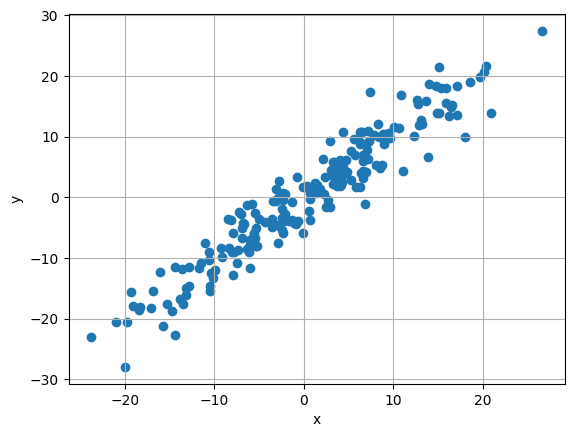

In [ ]:
import matplotlib.pyplot as plt

x=torch.randn(200, 1) * 10
y=x+3*torch.randn(200, 1)
plt.scatter(x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear=nn.Linear(1, 1)

  def forward(self, x):
    pred=self.linear(x)
    return pred

In [ ]:
model=LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.2461]], requires_grad=True), Parameter containing:
tensor([-0.5110], requires_grad=True)]


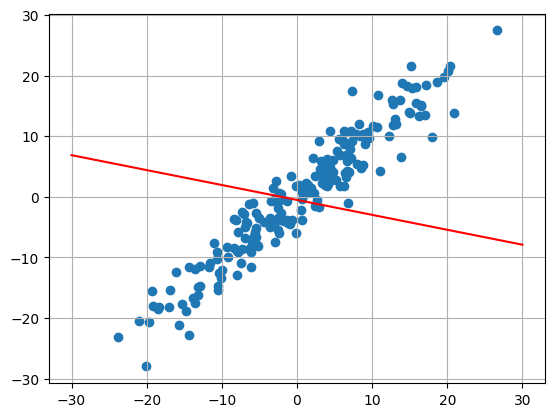

In [ ]:
import numpy as np

w, b=model.parameters()

w1, b1=w[0][0].item(), b[0].item()
x1=np.array([-30, 30])
y1=w1*x1+b1

plt.plot(x1, y1, 'r')
plt.scatter(x, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [ ]:
import torch.optim as optim

criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [ ]:
epochs=100
losses=[]

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred=model(x)
  loss=criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

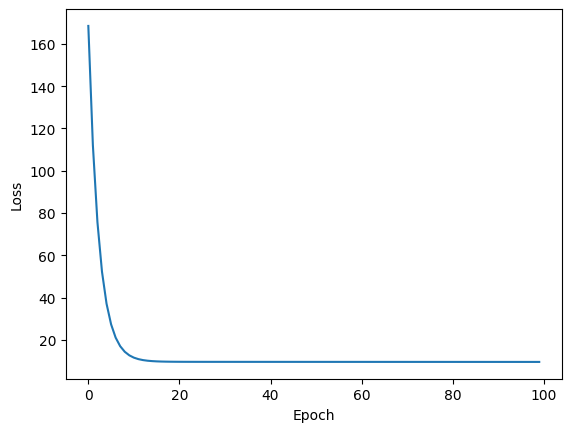

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

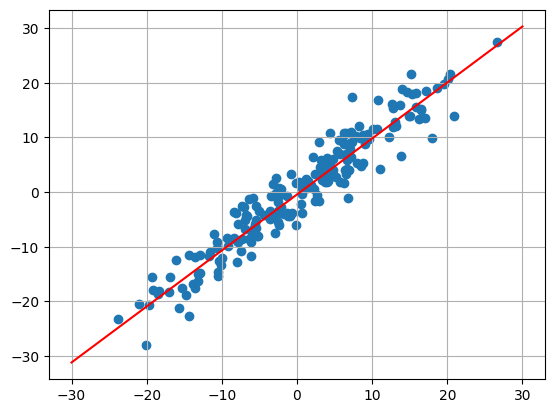

In [ ]:
w1, b1=w[0][0].item(), b[0].item()
x1=np.array([-30, 30])
y1=w1*x1+b1

plt.plot(x1, y1, 'r')
plt.scatter(x, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [ ]:
import torch

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [ ]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
#참고: https://teddylee777.github.io/pytorch/torchvision-transform/

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
trainset=datasets.FashionMNIST(root='/content/',
                        train=True, download=True,
                        transform=transform)

testset=datasets.FashionMNIST(root='/content/',
                        train=False, download=True,
                        transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 12815682.46it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202938.44it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3784997.08it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21106820.13it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
images, labels=next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

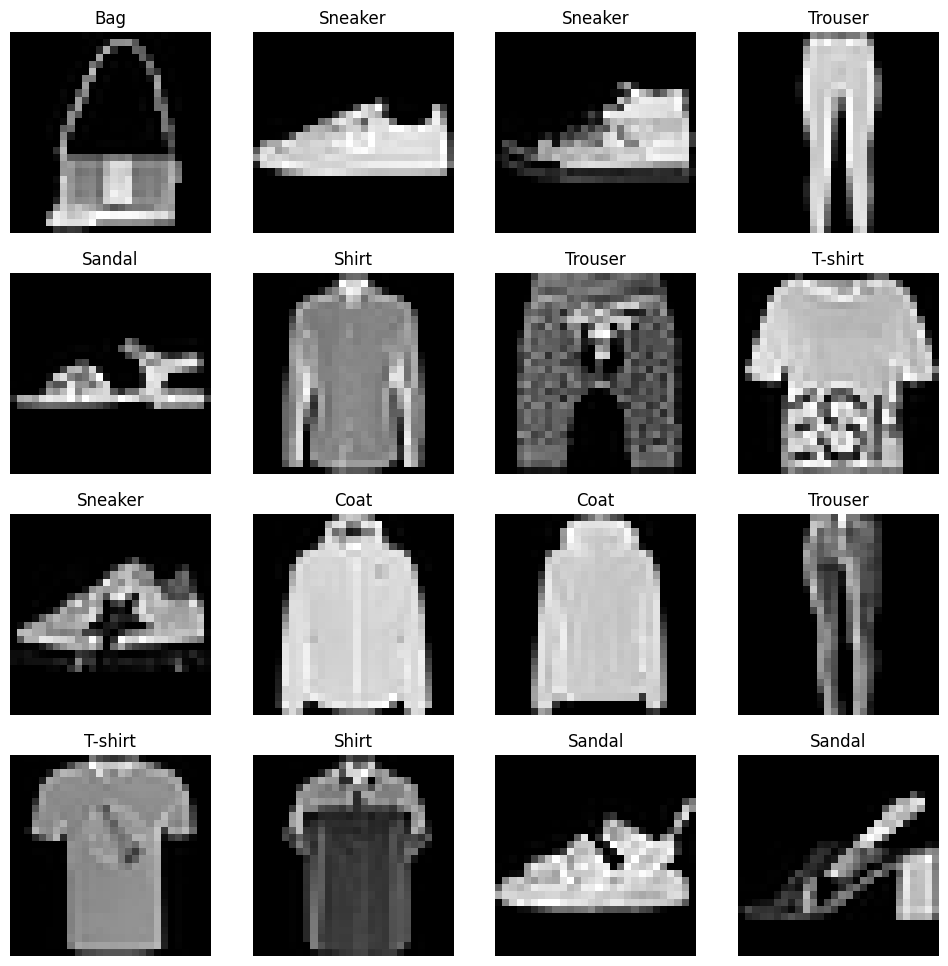

In [ ]:
import matplotlib.pyplot as plt


labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankie Boot',
}

figure = plt.figure(figsize=(12, 12))
cols, rows=4, 4
for i in range(1, cols*rows+1):
  image=images[i].squeeze()
  label_idx=labels[i].item()
  label=labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

plt.show()

In [ ]:
#no contents

### 모델 정의 및 파라미터

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1=nn.Conv2d(1, 6, 3)
    self.conv2=nn.Conv2d(6, 16, 3)
    self.fc1=nn.Linear(16*5*5, 120)
    self.fc2=nn.Linear(120, 84)
    self.fc3=nn.Linear(84, 10)

  def forward(self, x):
    x=F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x=F.max_pool2d(F.relu(self.conv2(x)), 2)
    x=x.view(-1, self.num_flat_features(x))
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

  def num_flat_features(self, x):
    size=x.size()[1:]
    num_features=1
    for s in size:
      num_features *= s

    return num_features

net=NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input=torch.randn(1, 1, 28, 28)
out=net(input)
print(out)

tensor([[ 0.0512, -0.1433, -0.0911,  0.1529,  0.0415, -0.1117, -0.1347, -0.0247,
          0.0252,  0.1277]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [ ]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [ ]:
total_batch=len(train_loader)
print(total_batch)

469


In [ ]:
for epoch in range(10):
  running_loss=0.0

  for i, data in enumerate(train_loader, 0):
    inputs, labels=data

    optimizer.zero_grad()

    outputs=net(inputs)
    loss=criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i%100 == 99:
      print('Epoch: ', epoch+1, ', Iter: ', i+1, ', Loss: ', running_loss/2000)
      running_loss=0.0



Epoch:  1 , Iter:  100 , Loss:  0.11500870561599731
Epoch:  1 , Iter:  200 , Loss:  0.11445950043201447
Epoch:  1 , Iter:  300 , Loss:  0.11336292791366577
Epoch:  1 , Iter:  400 , Loss:  0.11086509561538696
Epoch:  2 , Iter:  100 , Loss:  0.08724747663736343
Epoch:  2 , Iter:  200 , Loss:  0.05664917042851448
Epoch:  2 , Iter:  300 , Loss:  0.04425198704004288
Epoch:  2 , Iter:  400 , Loss:  0.03971871966123581
Epoch:  3 , Iter:  100 , Loss:  0.03645550289750099
Epoch:  3 , Iter:  200 , Loss:  0.035325324773788455
Epoch:  3 , Iter:  300 , Loss:  0.034042734533548356
Epoch:  3 , Iter:  400 , Loss:  0.034436096608638764
Epoch:  4 , Iter:  100 , Loss:  0.03311676223576069
Epoch:  4 , Iter:  200 , Loss:  0.03251517303287983
Epoch:  4 , Iter:  300 , Loss:  0.03256730237603188
Epoch:  4 , Iter:  400 , Loss:  0.030626121640205384
Epoch:  5 , Iter:  100 , Loss:  0.030815823227167128
Epoch:  5 , Iter:  200 , Loss:  0.03036909244954586
Epoch:  5 , Iter:  300 , Loss:  0.030842016711831094
Epoch:

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [ ]:
PATH='/fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net=NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [ ]:
def imshow(image):
  image=image/2+0.5
  npimg=image.numpy()

  fig=plt.figure(figsize=(16, 6))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

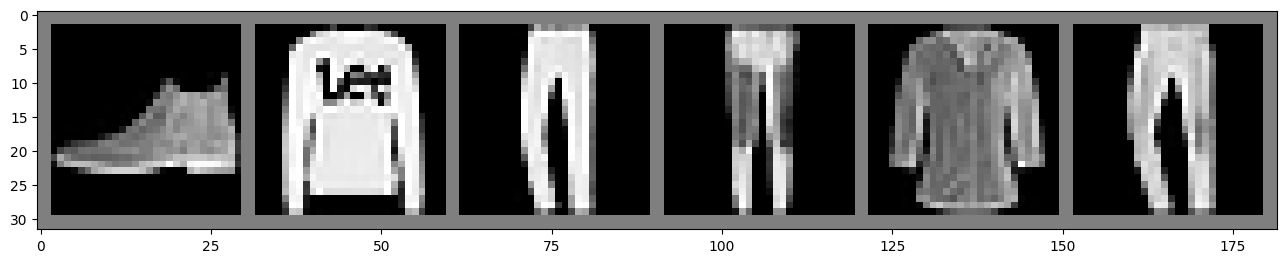

In [ ]:
import torchvision

dataiter=iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs=net(images)

_, predicted=torch.max(outputs, 1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 3, 9, 4, 8, 8, 3, 6, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1,
        2, 6, 6, 2, 5, 6, 4, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 6, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankie Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [ ]:
correct=0
total=0

with torch.no_grad():
  for data in test_loader:
    images, labels=data
    outputs=net(images)
    _, predicted=torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

print(100 * correct / total)

80.77
